# Exercise: Train a Model from IRIS DB using Bayes Method

The objective is to recognize a plant based on description of its leaves.

## Step 1: Load Libraries

In [1]:
# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

## Step 2: Load Dataset

Use __pandas__ to load the data from a file or from a data sets repository.<br>
It is a table data, stored in csv format.<br>
Columns contain the size of the leaves of various iris flowers. <br>
Specify the names of each column before loading the data.<br>
Create a dataset object.

In [2]:
# read the data
df = pd.read_csv("./data/diabetes.csv", sep = ',')

## Step 3: Get to Know Your Data

Investigate the dataset. <br>
Find out how many records are available, all they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [5]:
# See the shape and size 
df.shape

(768, 9)

In [6]:
# See how it looks (get the first 20 records)
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [48]:
# See how many classes are included and how the records per class are distributed
# Group by class attribute
print(df.groupby('Glucose').size())

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64


In [49]:
# Have the descriptive statistics calculated for the whole dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Multivariate Plots

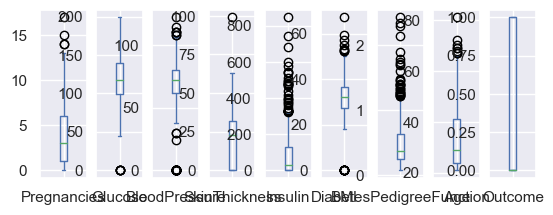

In [50]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(2,9), sharex=False, sharey=False)
plt.show()

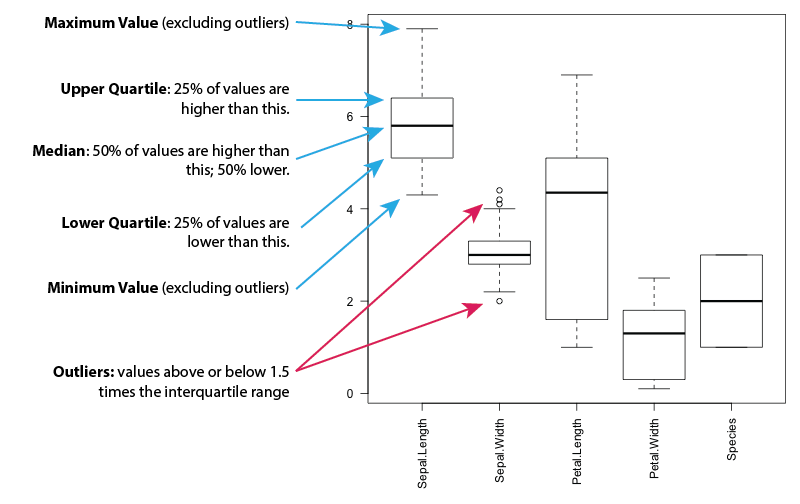![iris_interpret_boxplots.png](attachment:iris_interpret_boxplots.png)

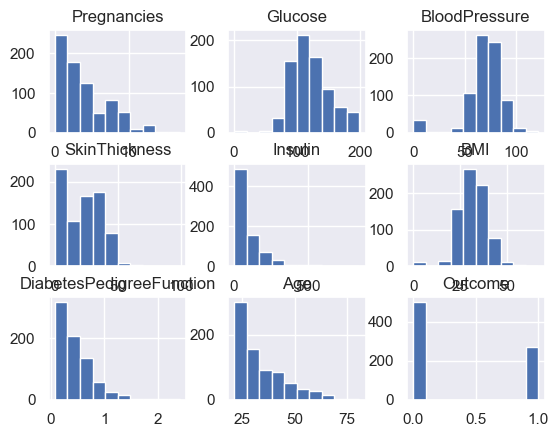

In [51]:
# Draw histograms
df.hist()
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Two of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

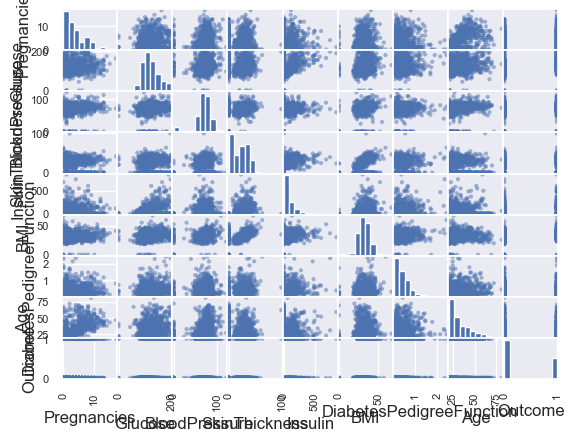

In [52]:
# Draw Multivariate Plots - scatterplots 
# These plots show the observed correlation between the attributes
scatter_matrix(df)
plt.show()

## Step 4: Training
Now let's try to train a model.
1. Divide the dataset into two: training set and test set
2. Implement Bayes algorithm for training with the training sub-set
3. Estimate how accurate is the model with the test sub-set

In [74]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset

# Convert the dataset into array
array = df.values
# Create two (sub) arrays from it
X = array[:,0:8] # data without class
Y = array[:,8]   # just class

In [75]:
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)


Now we have training data X_train and Y_train 
and validation data X_test and Y_test 

We are ready to apply algorithms for training a model from our data.
We try __Gaussian Naive Bayes (NB)__, as it is appropriate for analysis of numeric data.

In [76]:
# build the model from the train
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [90]:
# test the model on the test set
model.score(X_test, Y_test)

0.7532467532467533

## Step 5: Validating the Model

Now we can try the model on our validation set.

In [113]:
X_test[5]

array([  8.  , 133.  ,  72.  ,   0.  ,   0.  ,  32.9 ,   0.27,  39.  ])

In [92]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction[5]

0.0

In [93]:
Y_test

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0.])

In [94]:
prediction

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0.])

In [95]:
prediction.shape

(154,)

### Estimate the Accuracy

We need a metrics for the evaluation. <br>
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [96]:
# Set the metrics
scoring = 'accuracy'

In [97]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, prediction))

0.7532467532467533


#### Confusion Matrix

Confusion matrix provides an indication of the __three types of predictions__: 
- correct 
- false positive
- false negative.

There are four coeficients, calculated out of these types:
Precission, Recall, Accuracy, and F1 - a harmonic mean of Precission and Recall.

In [98]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
cmat = confusion_matrix(Y_test, prediction)
print(cmat)
print(classification_report(Y_test, prediction))

[[78 19]
 [19 38]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        97
         1.0       0.67      0.67      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



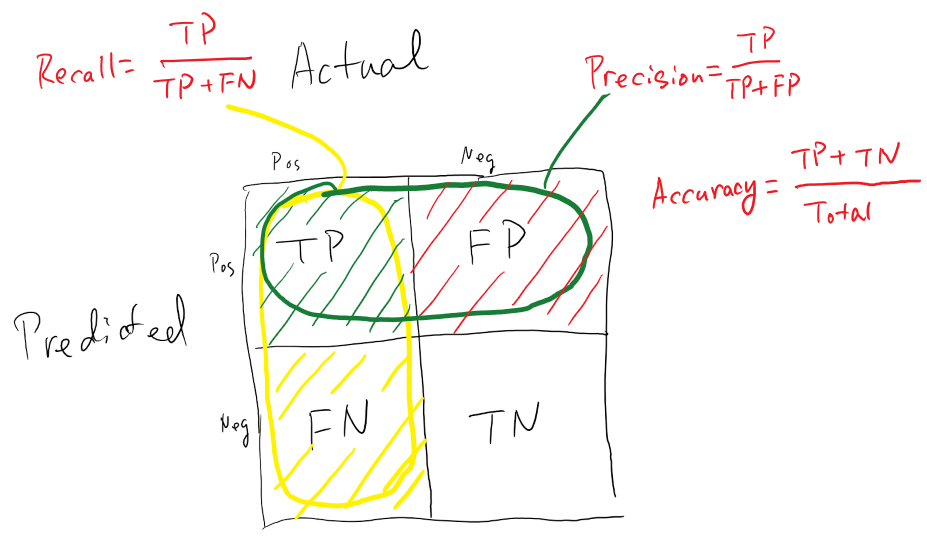![accuracy.png](attachment:accuracy.png)

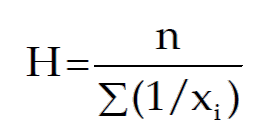

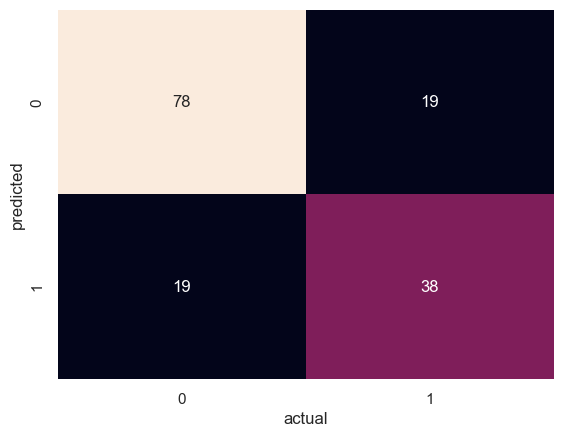

In [105]:
# visualize the confusion matrix by use of seaborn library
import seaborn as sns
sns.set()
sns.heatmap(cmat.T, square=False, annot=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

In [107]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, model.predict(X_train)))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, prediction))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       403
         1.0       0.67      0.60      0.63       211

    accuracy                           0.76       614
   macro avg       0.74      0.72      0.73       614
weighted avg       0.76      0.76      0.76       614

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        97
         1.0       0.67      0.67      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



In [108]:
Y_test

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0.])

### Validation with Random Data Samples

In [115]:
# m = array([  8.  , 133.  ,  72.  ,   0.  ,   0.  ,  32.9 ,   0.27,  39.  ]))
k = [[8.,133.,72.,0.,   0.  ,  32.9 ,   0.27,  39.  ]]
m = [[5.4, 3.0, 4.5, 1.5]] 
# my_prediction = model.predict(k)
my_prediction = model.predict(k)
my_prediction

array([0.])